Drug review analysis

In [4]:
#importing the requried modules

import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#importing the data_Set
df_train = pd.read_csv("drugsComTrain_raw.csv", parse_dates=["date"])
df_test = pd.read_csv("drugsComTest_raw.csv", parse_dates=["date"])

In [6]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [7]:
df_train.tail()

,uniqueID,drugName,condition,review,rating,date,usefulCount
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79
161296,215220,Lubiprostone,"Constipation, Chronic","""I&#039;ve had chronic constipation all my adu...",9,2014-12-13,116


In [9]:
df_train.shape

(161297, 7)

Understanding the data

In [10]:
print("unique values count of train : " ,len(set(df_train['uniqueID'].values)))

unique values count of train :  161297


Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

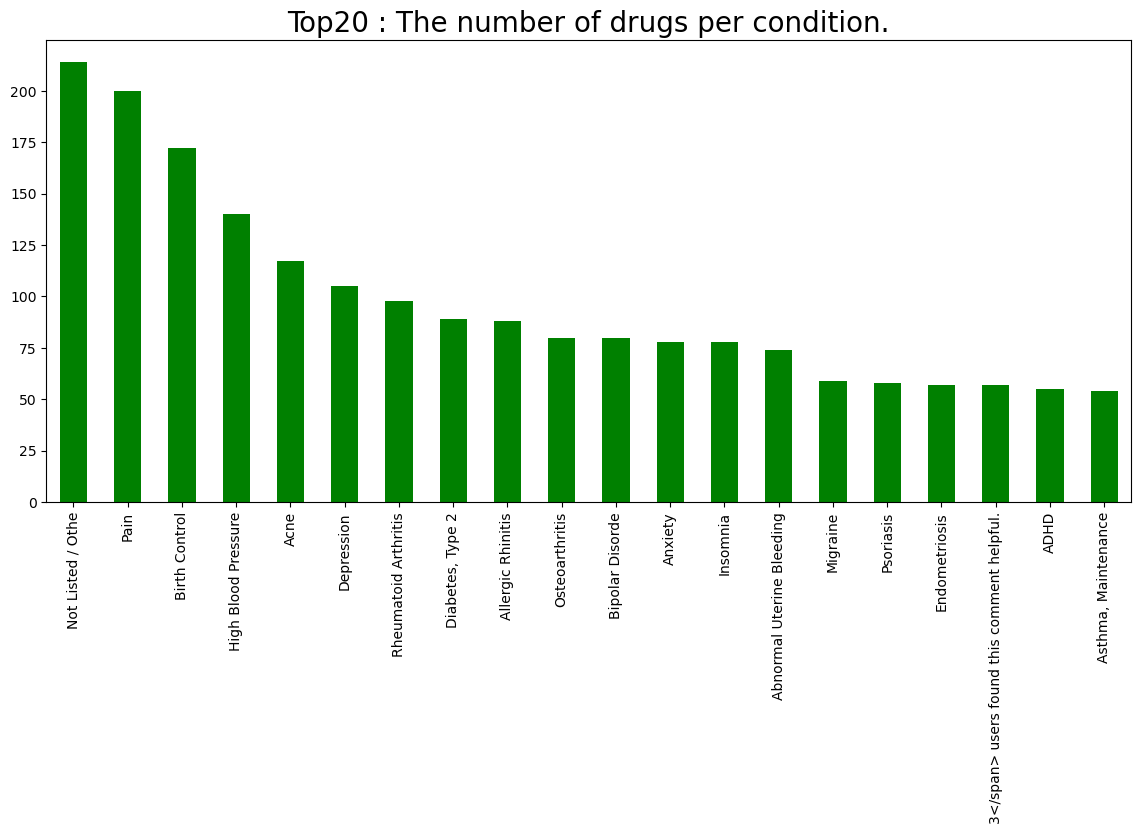

In [12]:
condition_dn = df_train.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [16]:
df_train[df_train['condition']=='3</span> users found this comment helpful.']

,uniqueID,drugName,condition,review,rating,date,usefulCount
243,81588,Yaz,3</span> users found this comment helpful.,"""I took Yaz for a little over 2 years. From a...",3,2010-06-01,3
1864,124318,Skyla,3</span> users found this comment helpful.,"""Never pregnant,28,retroverted small (6cm) ute...",1,2015-12-16,3
3322,202848,ProAir HFA,3</span> users found this comment helpful.,"""I get chest colds and asthmatic symptoms in t...",9,2015-12-12,3
6355,195303,Low-Ogestrel-21,3</span> users found this comment helpful.,"""After taking it for two months I noticed some...",8,2011-05-16,3
6968,230747,Tazorac,3</span> users found this comment helpful.,"""Started this 11 weeks ago. I am so so sad rig...",2,2016-05-31,3
...,...,...,...,...,...,...,...
148921,37672,Vyvanse,3</span> users found this comment helpful.,"""I love this product. It helps me so much, esp...",8,2009-10-28,3
149719,80680,Tussionex Pennkinetic,3</span> users found this comment helpful.,"""I have taken this medicine for three years. ...",10,2011-08-20,3
151269,9308,Lo Loestrin Fe,3</span> users found this comment helpful.,"""Started taking Lo Lo for bad perimenopausal s...",7,2016-12-22,3
151503,133268,Tri-Sprintec,3</span> users found this comment helpful.,"""I have been taking Tri-Sprintec for a little ...",9,2012-09-12,3


In [26]:
# remove the string '3</span> ' from the 'Col1' column
df_train['condition'] = df_train['condition'].str.replace('3</span> ', '')


In [28]:
print(df_train[df_train['uniqueID'] == 81588])
#remove the type error

     uniqueID drugName                          condition  \
243     81588      Yaz  users found this comment helpful.   

                                                review  rating       date  \
243  "I took Yaz for a little over 2 years.  From a...       3 2010-06-01   

     usefulCount  
243            3  
